In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
print(df.head())  # prints the first 5 rows

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


data preprocessing

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(df.tail())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
348,69,M,ASY,137,0,0,ST,104,Y,1.6,Flat,1


In [6]:
df.describe() #it gives description of only null values

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.describe(include="all") #it gives decription of all

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [8]:
#checking number of unique values
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [9]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
# we want only those data type is object in cat_col:
cat_col = df.select_dtypes(include='object').columns
print(cat_col)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [11]:
df['ChestPainType'].unique

<bound method Series.unique of 0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object>

In [12]:
range(df['ChestPainType'].nunique())

range(0, 4)

In [13]:
for col in cat_col:
    print(col)

print(df[col].unique()),list(range(df[col].nunique()))

df[col].replace((df[col].unique()),range(df[col].nunique()),inplace=True)
#inplace =true -> permenantly replace the values


Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope
['Up' 'Flat' 'Down']


In [14]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [15]:

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# ---- 0. copy original ----
df_orig = df.copy()

# ---- 1. Fill categorical NaNs (or you can use mode) ----
df_enc = df_orig.copy()
for col in cat_cols:
    df_enc[col] = df_enc[col].fillna('Missing').astype(str)

# ---- 2. Label encode categorical columns ----
encoders = {col: LabelEncoder() for col in cat_cols}
for col in cat_cols:
    df_enc[col] = encoders[col].fit_transform(df_enc[col])

# ---- 3. KNN impute (works because everything is numeric now) ----
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df_enc), columns=df_enc.columns)

# Keep a numeric dataframe for modeling
df_numeric = df_imputed.copy()

# ---- Optional: a display-friendly decoded dataframe ----
df_display = df_numeric.copy()
for col in cat_cols:
    n_classes = len(encoders[col].classes_)
    # round, convert to int, and clip to valid class range to avoid out-of-range indices
    vals = df_display[col].round().astype(int).clip(0, n_classes - 1)
    df_display[col] = encoders[col].inverse_transform(vals)


In [16]:
df['Cholesterol'].isna().sum()

np.int64(0)

In [17]:

# check for any o value normally
count=0
for i in df['Cholesterol']:
    if i==0:
        count+=1
print(count)


172


In [18]:
df['RestingBP'][df['RestingBP']==0]

449    0
Name: RestingBP, dtype: int64

In [19]:
df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [20]:
df['RestingBP'].isnull().sum()

np.int64(0)

In [21]:
# Step 1: Get all numeric (non-object) columns except 'Oldpeak'
numeric_cols = df.drop(columns='Oldpeak').select_dtypes(exclude='object').columns

# Step 2: Convert those columns to int32
df[numeric_cols] = df[numeric_cols].astype('int32')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(7), object(4)
memory usage: 61.1+ KB


Data Visualization


In [23]:

import plotly.express as px




In [24]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
261,54,F,ATA,120,221,0,Normal,138,N,1.0,0,0


In [25]:
df_numeric.corr()['HeartDisease'][:-1].sort_values()


MaxHR            -0.400421
ChestPainType    -0.386828
Cholesterol      -0.232741
RestingECG        0.057384
RestingBP         0.107589
FastingBS         0.267291
Age               0.282039
Sex               0.305445
Oldpeak           0.403951
ExerciseAngina    0.494282
ST_Slope          0.558771
Name: HeartDisease, dtype: float64

In [26]:
px.line(df_numeric.corr()['HeartDisease'][:-1].sort_values())

In [27]:
px.sunburst(df,path=['HeartDisease','Age'])

In [28]:
px.histogram(df,x='Age',color='HeartDisease')

In [29]:
# Percentage of heart disease data distribution
px.pie(df,names="HeartDisease",title='percentage of HeartDisease classes distribution')

In [30]:
# Sex vs HeartDisease
px.histogram(df,x='Sex',color='HeartDisease')

In [31]:
px.histogram(df,x='ChestPainType',color='HeartDisease')

In [32]:
px.sunburst(df,path=['HeartDisease','RestingBP'])

In [33]:
px.histogram(df,x='FastingBS',color = 'HeartDisease')

In [34]:
px.histogram(df,x='MaxHR',color='HeartDisease')

In [35]:
px.violin(df,x='HeartDisease',y='MaxHR',color='HeartDisease')

In [36]:
px.violin(df,x='HeartDisease',y='Oldpeak',color='HeartDisease')

In [37]:
px.histogram(df,x='ST_Slope',color='HeartDisease')

In [38]:
px.histogram(df,x='ExerciseAngina',color='HeartDisease')

Model Training


In [39]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df_numeric.drop('HeartDisease', axis=1)
y = df_numeric['HeartDisease'].astype(int)   # ensure y is integer labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Logistic regression

In [40]:
#Model Training
#Logistic regression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_solver = None
best_score = -1
solver_scores = []

for solver in solvers:
    try:
        lr = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
        lr.fit(X_train, y_train)
        score = lr.score(X_test, y_test)
        solver_scores.append((solver, score))
        if score > best_score:
            best_score = score
            best_solver = solver
    except Exception as e:
        # print the solver that failed and continue
        print(f"Solver {solver} failed: {e}")

print(f"\nBest solver: {best_solver} with accuracy {best_score:.4f}")


Best solver: lbfgs with accuracy 0.8750


In [41]:
final_lr = LogisticRegression(solver=best_solver, max_iter=1000, random_state=42)
final_lr.fit(X_train, y_train)
y_pred = final_lr.predict(X_test)
print("Final accuracy:", accuracy_score(y_test, y_pred))


Final accuracy: 0.875


Support Vector Machine(SVM)

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0,'poly':0,'rbf':0,'sigmoid':0}
best = ''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(X_train,y_train)
    yhat = svm.predict(X_test)
    kernels[i] = f1_score(y_test,yhat,average='weighted')
    if kernels[i] == max(kernels.values()):
        best = i
    
print(best)
svm = SVC(kernel=best)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print(f'SVM f1_score kernel{{best}}: {f1_score(y_test,svm_pred,average="weighted")}')

linear
SVM f1_score kernel{best}: 0.8630563182743023


Decision Tree classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state' : [0,42]
}
grid_search = GridSearchCV(dtree,param_grid, cv=5) # cv =cross validation 
grid_search.fit(X_train,y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train,y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTrees's Accuracy: " ,accuracy_score(y_test,dtc_pred))

DecisionTrees's Accuracy:  0.8206521739130435


Random Forest Classifier

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 100}
Accuracy: 0.8587
F1-score (weighted): 0.8574

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        82
           1       0.84      0.92      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



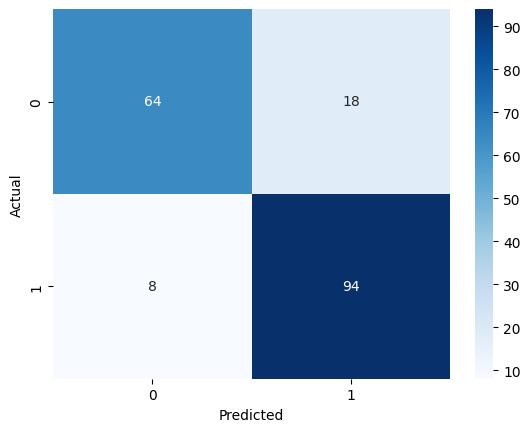

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 19],
    'max_leaf_nodes': [3, 6, 9],
}

# Grid search
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rfc,
    param_grid,
    cv=5,
    scoring='f1_weighted',  # more robust than accuracy for imbalanced data
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best model
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

# Metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [45]:
import pickle
dt = DecisionTreeClassifier().fit(X_train, y_train)
pickle.dump(dt, open("DecisionTree.pkl", "wb"))

lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
pickle.dump(lr, open("LogisticRegression.pkl", "wb"))

rf = RandomForestClassifier().fit(X_train, y_train)
pickle.dump(rf, open("RandomForest.pkl", "wb"))

svm = SVC(probability=True).fit(X_train, y_train)
pickle.dump(svm, open("SVM.pkl", "wb"))